# Comparison of prokayotic MAGs' quality metrics

## Initialize

In [1]:
library(dplyr)
#install.packages("readr")
library(data.table)
library(patchwork)
library(ggplot2)
library(readr)
library(purrr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose




In [2]:
MIN_COMPLETENESS = 20 # MAG threshold for the visualization

In [3]:
options(repr.matrix.max.rows=6, repr.matrix.max.cols=20)

## Load data and process

In [4]:
#all_paths_b3 = list.files(path = paste0(work_dir, "data/"), pattern = "^bin3c_*", full.names = TRUE)
#all_paths_mb = list.files(path = paste0(work_dir, "data/"), pattern = "^metabat*", full.names = TRUE)
all_paths_b3 = list.files(path = paste0("data/"), pattern = "^bin3c_*", full.names = TRUE)
all_paths_mb = list.files(path = paste0("data/"), pattern = "^metabat*", full.names = TRUE)

In [5]:
# load all files at once and prepare the data frame
all_content = map_dfr(c(all_paths_b3, all_paths_mb), ~read.table(.x, header = TRUE, sep = "\t", 
    colClasses = "character") %>% # 1st read as char, then convert because of the type casting error by default
    mutate(filename=.x)) %>%
    mutate(Completeness = as.double(Completeness),
        Contamination = as.double(Contamination),
        Strain.heterogeneity = as.double(Strain.heterogeneity),
        Coverage = as.double(Coverage),
        Coverage_perc = parse_number(Coverage..)
        ) %>%
    mutate(sample = gsub("^([^_]+)_([^_]+)(_.+)?$", "\\2", basename(filename))) %>%
    mutate(Binner = gsub("^([^_]+)_([^_]+)(_.+)?$", "\\1", basename(filename))) %>%
    mutate(MAG.ID = paste0(sample, "_", MAG.ID)) %>%
    select(-Coverage.., -filename) 
all_content

MAG.ID,Completeness,Contamination,Strain.heterogeneity,Coverage,Taxonomy,Coverage_perc,sample,Binner
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
B14_CL001,81.76,9.84,44.74,42.5794,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus acetotolerans,100.00,B14,bin3c
B2_CL02,99.18,1.39,50.00,54.3376,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus damnosus,0.45,B2,bin3c
B2_CL03,97.73,5.01,94.74,3689.6950,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus acetotolerans,30.59,B2,bin3c
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
C33_bin.4,4.82,0,0,51.93380,,16.80,C33,metabat
C33_bin.3,2.96,0,0,12.04820,,3.90,C33,metabat
C33_bin.1,0.00,0,0,16.59315,,5.37,C33,metabat


In [6]:
# filter some samples
all_content = all_content %>% filter(sample != "B14") # includes Hi-C only

In [7]:
# rename metabat
all_content = all_content %>% mutate(Binner = gsub("metabat", "MetaBAT2", Binner)) %>%
    mutate(Binner = gsub("bin3c", "bin3C", Binner))

In [8]:
# filtering by completeness
all_res_mod = all_content %>% filter(Completeness >= MIN_COMPLETENESS)
all_res_mod

MAG.ID,Completeness,Contamination,Strain.heterogeneity,Coverage,Taxonomy,Coverage_perc,sample,Binner
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
B2_CL02,99.18,1.39,50.00,54.3376,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus damnosus,0.45,B2,bin3C
B2_CL03,97.73,5.01,94.74,3689.6950,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus acetotolerans,30.59,B2,bin3C
B25_CL03,99.38,0.00,0.00,2352.3000,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus damnosus,59.03,B25,bin3C
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
C31_bin.3,98.12,3.59,0.0,30.90220,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Secundilactobacillus;s__Secundilactobacillus collinoides,13.13,C31,MetaBAT2
C31_bin.1,86.76,38.04,80.3,35.99875,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Oenococcus;s__Oenococcus oeni,15.30,C31,MetaBAT2
C33_bin.5,72.05,94.97,80.0,19.76575,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Tatumella;s__Tatumella ptyseos,6.39,C33,MetaBAT2


### Contamination: Hi-C vs. WGS

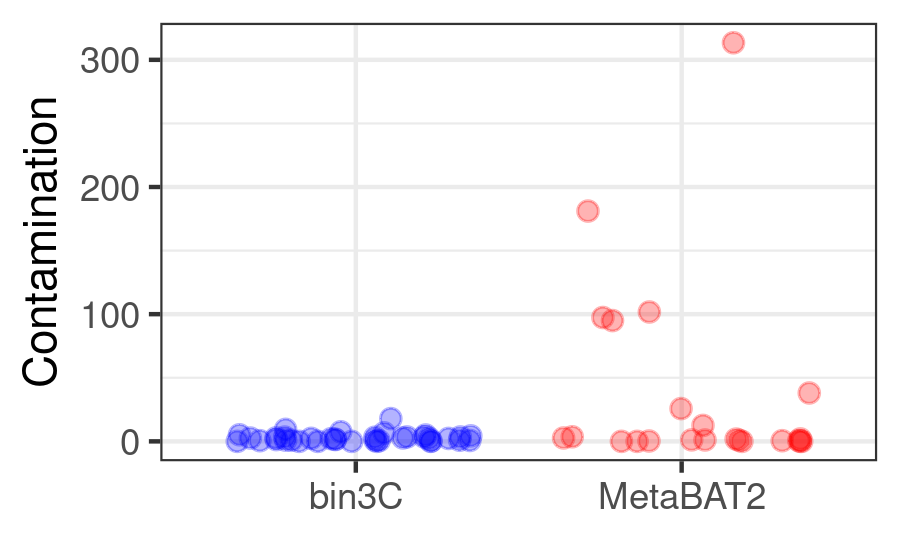

In [9]:
options(repr.plot.width = 3, repr.plot.height = 1.8, repr.plot.res = 300)
all_res_mod %>% ggplot(aes(y = Contamination, x = Binner, color = Binner)) +
    #geom_boxplot(size = 0.3) +
    geom_jitter(size = 2, alpha = 0.3) + 
    theme_bw() +
    scale_color_manual(values=c("blue", "red")) +
    theme(axis.title.x = element_blank(),
       legend.position = "none")




### filling with zeroes to plot the averages

In [10]:
all_res_mod = all_res_mod %>% group_by(Binner, sample) %>%
    mutate(n_mag = row_number(-Completeness)) %>%
    mutate(max_n_mag_per_sample_per_flag = max(n_mag)) %>%
    ungroup() %>%
    group_by(sample) %>%
    mutate(max_n_mag_per_sample = max(max_n_mag_per_sample_per_flag)) %>%
    ungroup() %>%
    select(-max_n_mag_per_sample_per_flag)
all_res_mod


MAG.ID,Completeness,Contamination,Strain.heterogeneity,Coverage,Taxonomy,Coverage_perc,sample,Binner,n_mag,max_n_mag_per_sample
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
B2_CL02,99.18,1.39,50.00,54.3376,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus damnosus,0.45,B2,bin3C,1,2
B2_CL03,97.73,5.01,94.74,3689.6950,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus;s__Lactobacillus acetotolerans,30.59,B2,bin3C,2,2
B25_CL03,99.38,0.00,0.00,2352.3000,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Pediococcus;s__Pediococcus damnosus,59.03,B25,bin3C,1,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
C31_bin.3,98.12,3.59,0.0,30.90220,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Secundilactobacillus;s__Secundilactobacillus collinoides,13.13,C31,MetaBAT2,1,2
C31_bin.1,86.76,38.04,80.3,35.99875,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Oenococcus;s__Oenococcus oeni,15.30,C31,MetaBAT2,2,2
C33_bin.5,72.05,94.97,80.0,19.76575,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Tatumella;s__Tatumella ptyseos,6.39,C33,MetaBAT2,1,2


In [11]:
all_res_mod_zerofill_global = all_res_mod %>% select(n_mag, Completeness, sample, Binner) %>%
    pivot_wider(names_from = n_mag, values_from = Completeness, values_fill = 0) %>%
    pivot_longer(cols = -c(sample, Binner), names_to = "n_mag", values_to = "Completeness") %>%
    mutate(n_mag = as.numeric(n_mag))
all_res_mod_zerofill_global

sample,Binner,n_mag,Completeness
<chr>,<chr>,<dbl>,<dbl>
B2,bin3C,1,99.18
B2,bin3C,2,97.73
B2,bin3C,3,0.00
⋮,⋮,⋮,⋮
C33,MetaBAT2,9,0
C33,MetaBAT2,10,0
C33,MetaBAT2,11,0


In [12]:
all_res_mod_zerofill_per_sample = all_res_mod %>% select(n_mag, Completeness, sample, Binner) %>%
    pivot_wider(names_from = Binner, values_from = Completeness, values_fill = 0) %>%
    pivot_longer(cols = c(bin3C, MetaBAT2), names_to = "Binner", values_to = "Completeness")
all_res_mod_zerofill_per_sample

n_mag,sample,Binner,Completeness
<int>,<chr>,<chr>,<dbl>
1,B2,bin3C,99.18
1,B2,MetaBAT2,100.00
2,B2,bin3C,97.73
⋮,⋮,⋮,⋮
2,C33,MetaBAT2,0.00
1,C34,bin3C,54.21
1,C34,MetaBAT2,0.00


### Plot values without adding zeros

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


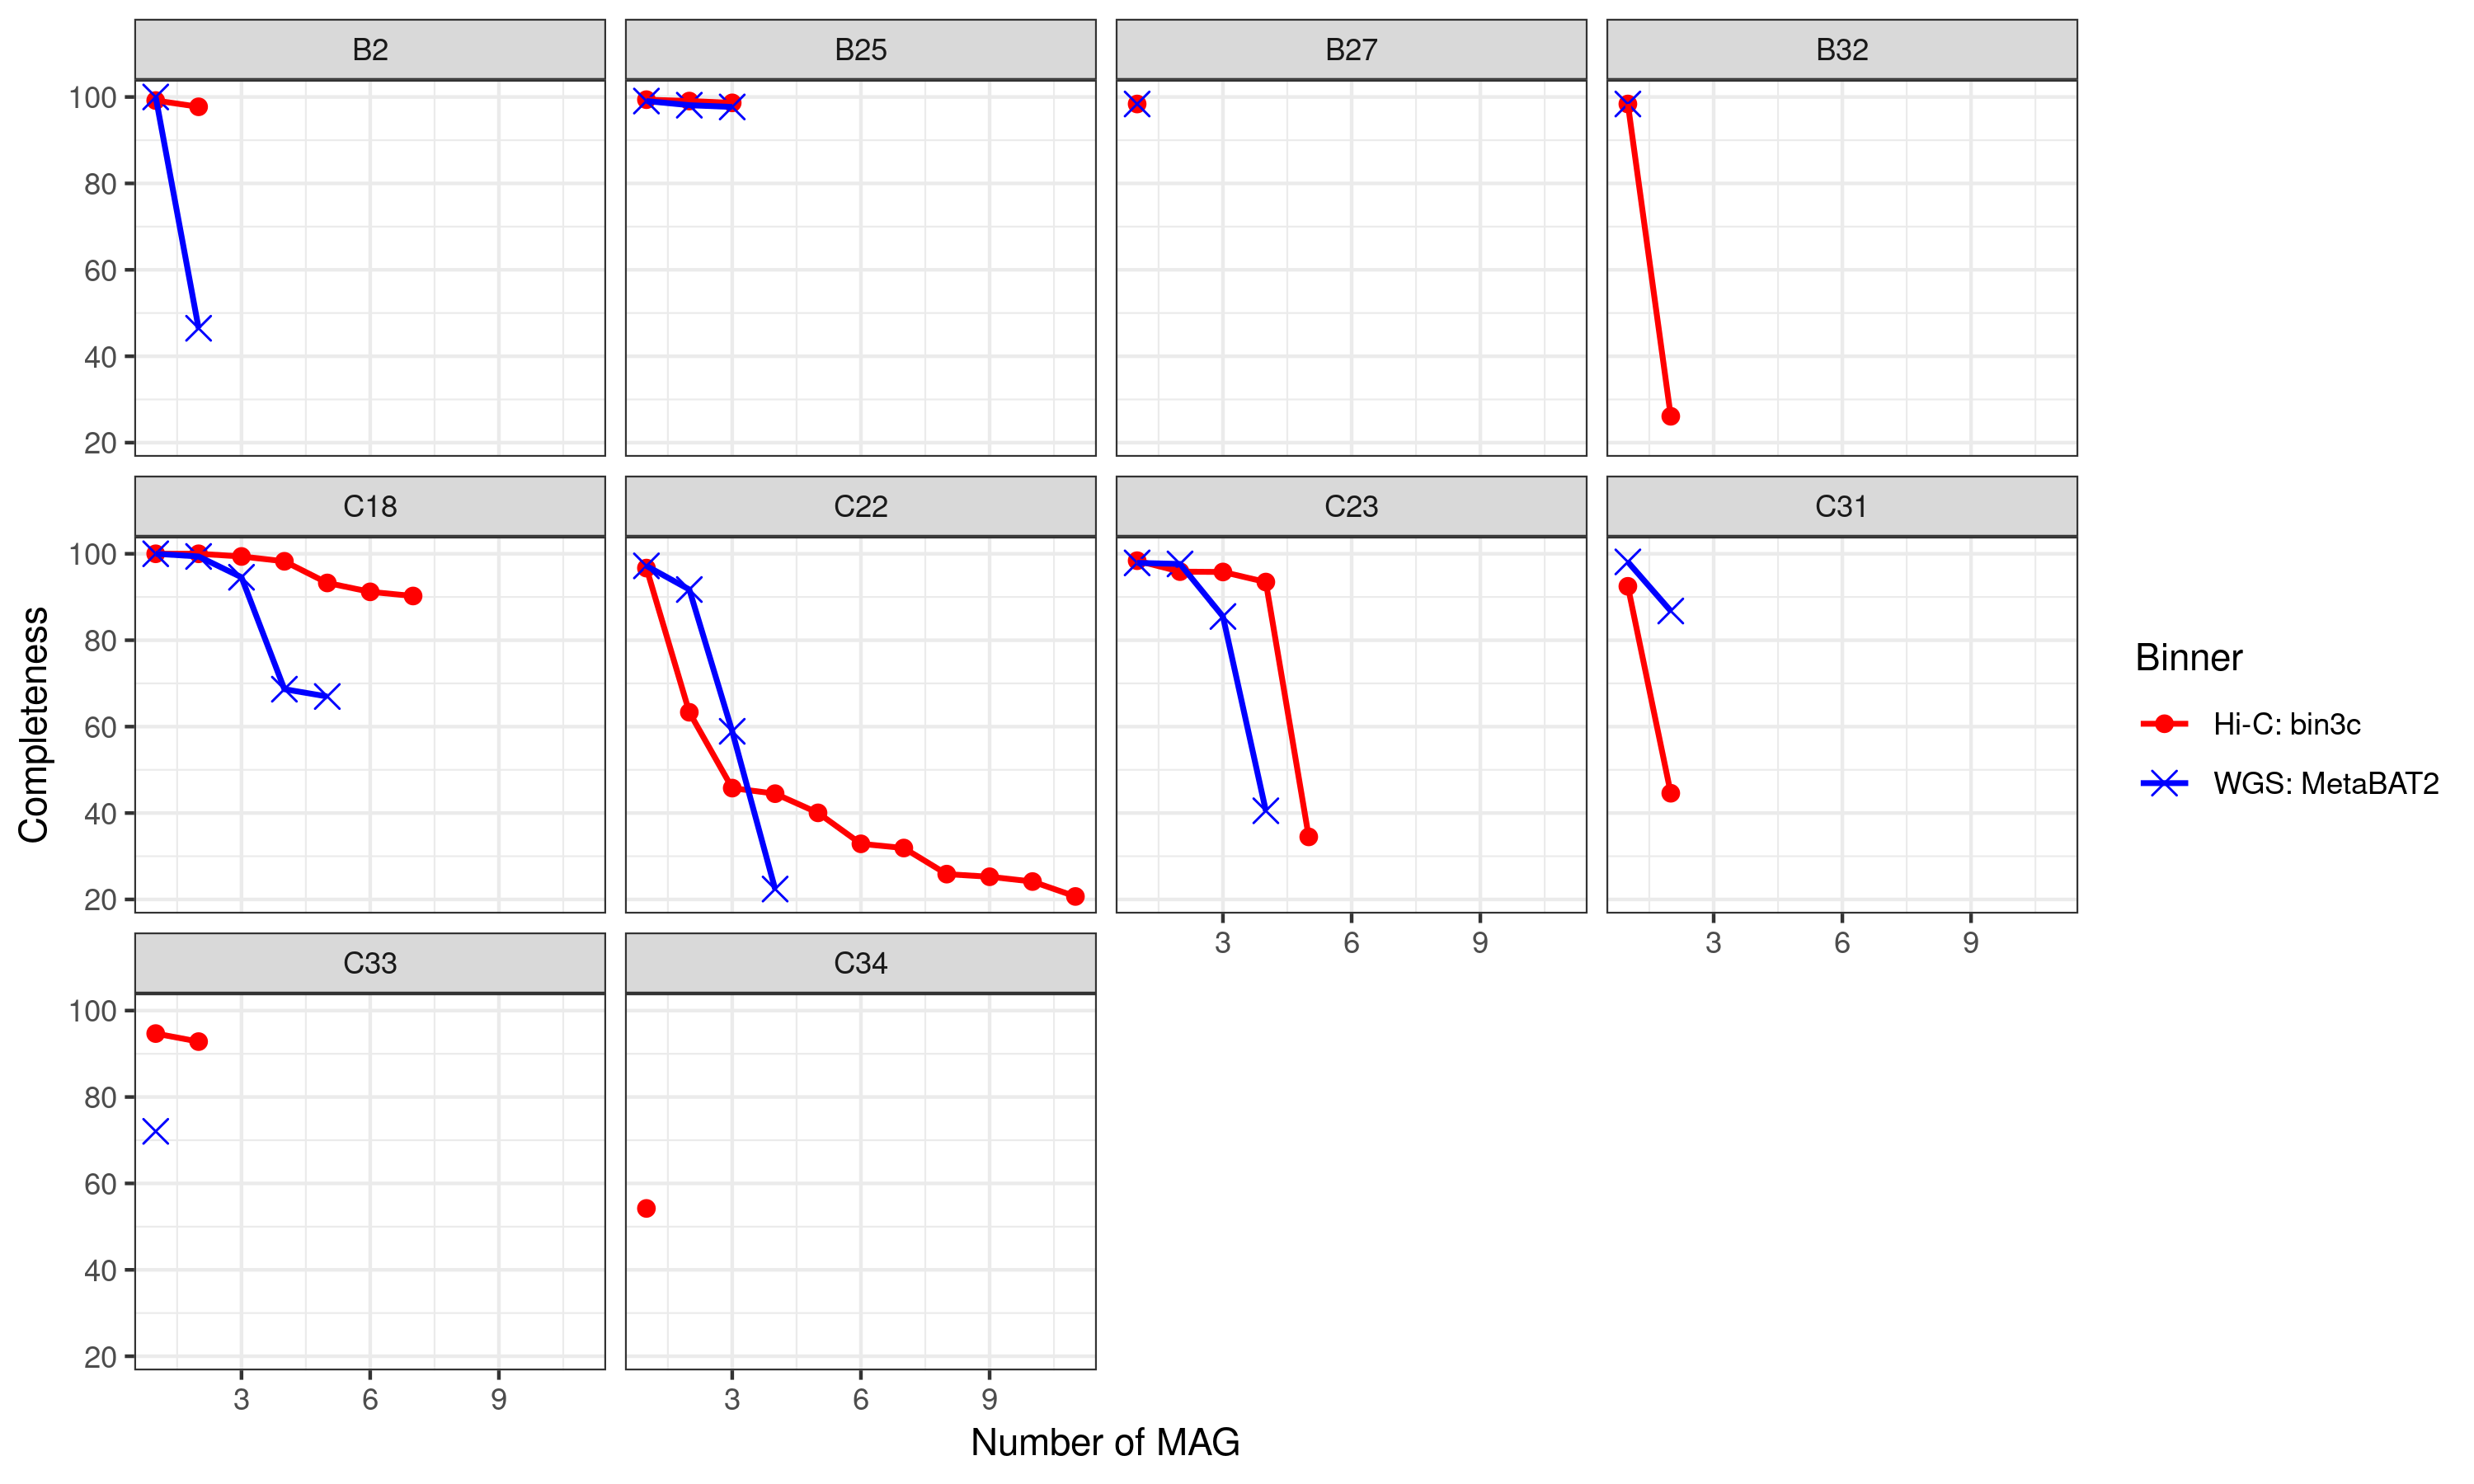

In [13]:
# plot decreasing Completeness for each sample, per binning method
options(repr.plot.width = 10, repr.plot.height = 6, repr.plot.res = 300)
p1 = ggplot(all_res_mod %>% 
  mutate(Binner = gsub("MetaBAT2", "WGS: MetaBAT2", Binner)) %>%
    mutate(Binner = gsub("bin3C", "Hi-C: bin3c", Binner))
, aes(x = n_mag, y = Completeness, color = Binner, shape = Binner)) + 
  facet_wrap(~sample) +
  geom_point(size = 3) + 
  geom_line(size = 0.8) + 
  scale_color_manual(values=c("red", "blue")) +
  scale_shape_manual(values=c(20, 4)) +
  xlab("Number of MAG") +
  theme_bw()
p1

`geom_smooth()` using formula = 'y ~ x'


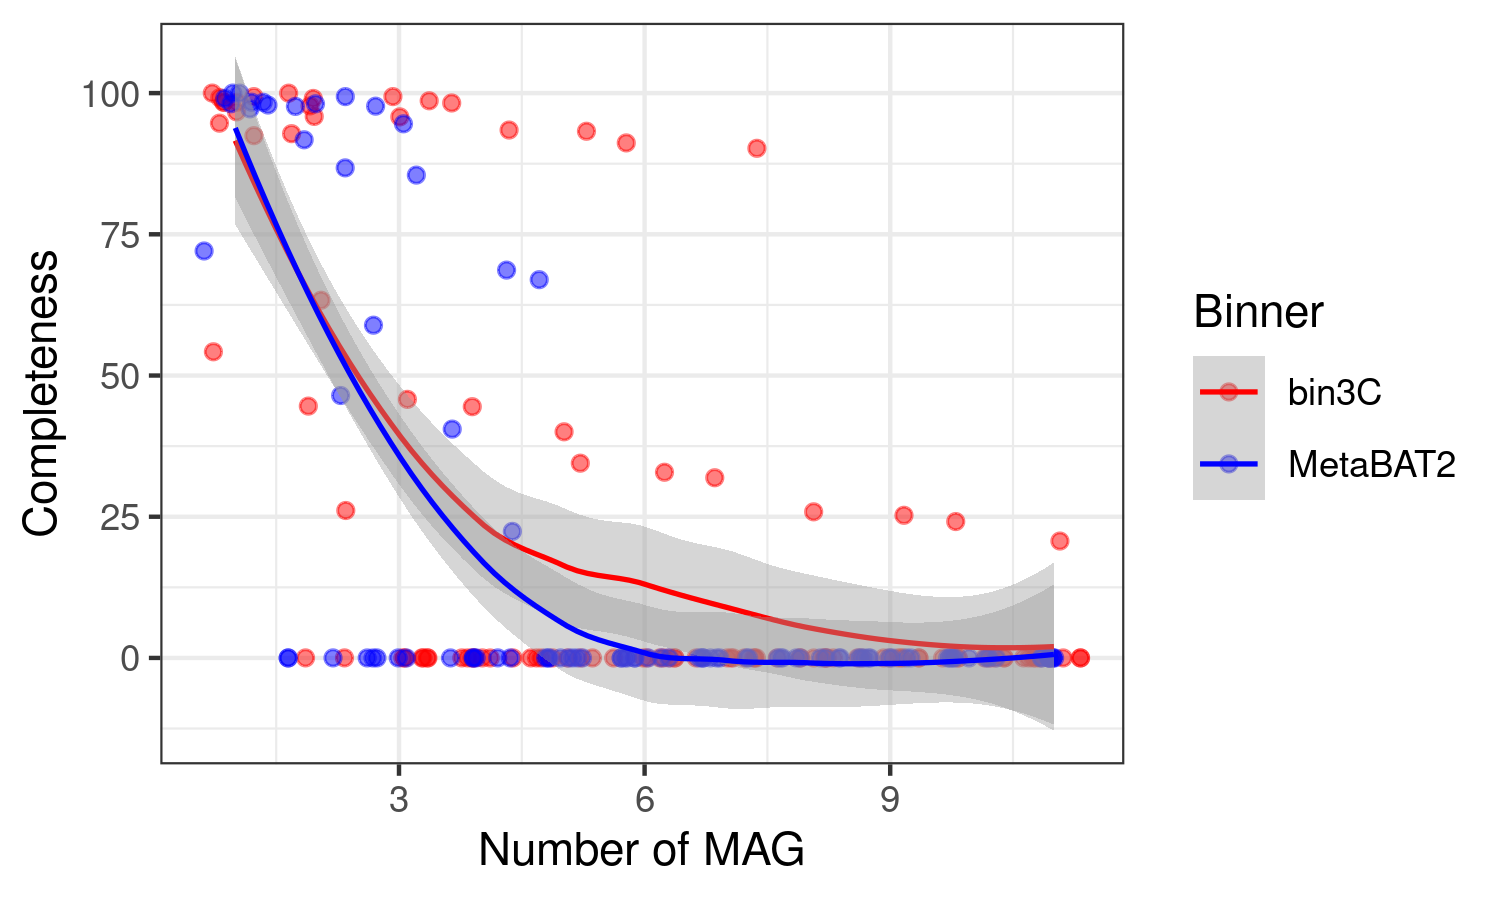

In [14]:
# plot decreasing Completeness averaged across the samples, per binning method
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 300)
p1 = ggplot(all_res_mod_zerofill_global, aes(x = n_mag, y = Completeness, group = Binner, color = Binner)) + 
  geom_jitter(alpha = 0.5, size = 1.5) +
  geom_smooth(size = 0.6, method = "loess") + #"lm") #+
  scale_color_manual(values=c("red", "blue")) +
  xlab("Number of MAG") +
  theme_bw()
p1

In [15]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.10.0 
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Moscow
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] tidyr_1.3.0       purrr_1.0.2       readr_2.1.5       ggplot2_3.4.3    
[5] patchwork_1.1.3   data.table_1.14.8 dplyr_1.1.2      

loaded via a namespace (and not attached):
 [1] Matrix_1.6-3        gtable